# Capstone Project Model - CNN

## Import libraries

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
import glob
import itertools
from sklearn import metrics
from keras import regularizers
from sklearn.model_selection import train_test_split


## For CNN 
# import tensorflow and kera
import tensorflow as tf
from tensorflow import keras

from keras.layers import Conv1D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool1D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Rescaling
from keras.callbacks import TensorBoard

## Import the clean cow data

In [245]:
SNPs = pd.read_csv('../Mini_project_3/SNP_clean_by_chi2.csv')
milk = pd.read_csv('../Mini_project_3/y.csv')

In [246]:
SNPs.head()

,Unnamed: 0,SNP1,SNP2,SNP3,SNP5,SNP20,SNP49,SNP77,SNP93,SNP100,...,SNP42462,SNP42483,SNP42489,SNP42493,SNP42503,SNP42507,SNP42522,SNP42523,SNP42530,SNP42535
0,0,1,2,2,0,1,1,2,2,2,...,2,1,2,1,2,2,1,0,1,0
1,1,0,1,2,2,0,0,2,2,1,...,2,0,2,0,2,1,1,1,1,2
2,2,0,2,1,2,0,2,2,2,1,...,2,0,2,0,2,2,2,2,1,2
3,3,1,2,2,2,0,2,2,2,1,...,1,0,1,0,1,1,1,1,1,1
4,4,1,2,2,1,0,2,2,0,2,...,1,1,2,0,1,2,2,2,0,1


In [247]:
milk.head()

,Unnamed: 0,mkg
0,0,-1.765576
1,1,-1.268380
2,2,-0.437640
3,3,-1.153043
4,4,-1.006533


In [248]:
X = SNPs.iloc[:,1:]
y = milk.iloc[:,1:]

## Prepare test and train data

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [250]:
X_test.shape

(1005, 4157)

In [251]:
X_train.shape

(4019, 4157)

In [252]:
def plot_both(train_true, train_predict, test_true, test_predict):

    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
    plt.scatter(x=train_true, y=train_predict)
    plt.xlabel('True Milk Yield')
    plt.ylabel('Predicted Milk Yield')
    title = 'Train - Predicted VS True Milk Yield, R2=' + str(r2_score(train_true, train_predict))
    plt.title(title)

    # Plotting the second subplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
    plt.scatter(x=test_true, y=test_predict)
    plt.xlabel('True Milk Yield')
    plt.ylabel('Predicted Milk Yield')
    title = 'Test - Predicted VS True Milk Yield, R2=' + str(r2_score(test_true, test_predict))
    plt.title(title)

    # Adjust layout to prevent overlapping labels
    plt.tight_layout()

    # Show the plot
    plt.show()

In [253]:
keras.utils.set_random_seed(812)

## Building model

In [254]:
# convert X to np.array

X_train_array_float32 = X_train.astype(np.float32).to_numpy()
X_train_array_float32

array([[1., 1., 1., ..., 0., 0., 1.],
       [0., 2., 2., ..., 1., 2., 2.],
       [1., 2., 2., ..., 1., 1., 2.],
       ...,
       [1., 2., 2., ..., 1., 2., 1.],
       [0., 2., 2., ..., 2., 1., 2.],
       [2., 2., 2., ..., 2., 2., 0.]], dtype=float32)

In [255]:
X_train_array_float32.shape

(4019, 4157)

In [256]:
X_train_array_float32_rs = np.reshape(X_train_array_float32,(4019,4157))
X_train_array_float32_rs

array([[1., 1., 1., ..., 0., 0., 1.],
       [0., 2., 2., ..., 1., 2., 2.],
       [1., 2., 2., ..., 1., 1., 2.],
       ...,
       [1., 2., 2., ..., 1., 2., 1.],
       [0., 2., 2., ..., 2., 1., 2.],
       [2., 2., 2., ..., 2., 2., 0.]], dtype=float32)

In [257]:
X_train_array_float32_rs.shape

(4019, 4157)

In [258]:
y_train_array_float32 = y_train.astype(np.float32).to_numpy()
y_train_array_float32_rs = np.reshape(y_train_array_float32,(4019,1))

SNPs is the image of 1 pixel x 42551. 

### Model 1 - MLP 

In [259]:
%%time
model_p = Sequential()
model_p.add(Dense(64, activation='linear', input_shape=(4157,)))
model_p.add(Dense(64))
model_p.add(Dense(1))

# Compile the model
model_p.compile(
    optimizer="adam",
    loss=tf.losses.MeanSquaredError(),
    metrics=['mse','r2_score']
)

# Print model summary
model_p.summary()

history_p = model_p.fit(
    X_train_array_float32_rs,
    y_train_array_float32_rs,
    validation_split=0.2,
    batch_size=10,
    epochs = 10)



Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_136 (Dense)               │ (None, 64)             │       266,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,337 (1.03 MB)

 Trainable params: 270,337 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.2813 - mse: 73.2815 - r2_score: -75.5767 - val_loss: 0.9867 - val_mse: 0.9872 - val_r2_score: 0.0299
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9896 - mse: 0.9896 - r2_score: 0.0058 - val_loss: 0.7994 - val_mse: 0.7995 - val_r2_score: 0.2143
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7592 - mse: 0.7592 - r2_score: 0.2379 - val_loss: 0.6817 - val_mse: 0.6815 - val_r2_score: 0.3303
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.6113 - mse: 0.6113 - r2_score: 0.3868 - val_loss: 0.6705 - val_mse: 0.6698 - val_r2_score: 0.3418
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.4980 - mse: 0.4980 - r2_score: 0.4992 - val_loss: 0.6919 - val_mse: 0.6909 - val_r2_score: 0.3210
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.4149 - mse: 0.4149 - r2_score: 0.5817 - val_loss: 0.7066 - val_mse: 0.7056 - val_r2_score: 0.3066
Epoch 7/10
322/322 ━━━━━━━━━━━

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


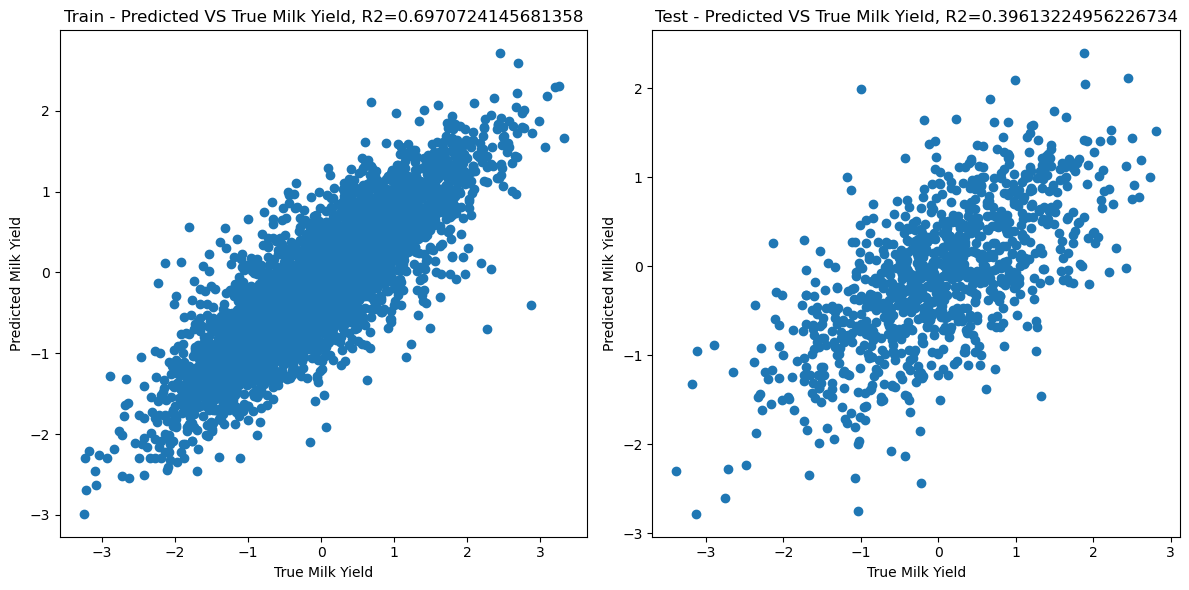

In [260]:
model_for_plot = model_p
predict_train= model_for_plot.predict(X_train_array_float32_rs)
predict_test= model_for_plot.predict(X_test_array_float32)
plot_both(y_train,predict_train, y_test,predict_test)

### Model 2 : CNN

Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_92 (Conv1D)              │ (None, 415, 64)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_62 (Flatten)            │ (None, 26560)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 64)             │     1,699,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,833 (6.50 MB)

 Trainable params: 1,704,833 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 58.7245 - mse: 58.7246 - r2_score: -60.5477 - val_loss: 0.6928 - val_mse: 0.6948 - val_r2_score: 0.3172
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8402 - mse: 0.8402 - r2_score: 0.1562 - val_loss: 0.5818 - val_mse: 0.5830 - val_r2_score: 0.4270
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5426 - mse: 0.5426 - r2_score: 0.4558 - val_loss: 0.5487 - val_mse: 0.5495 - val_r2_score: 0.4600
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3978 - mse: 0.3978 - r2_score: 0.6007 - val_loss: 0.5607 - val_mse: 0.5610 - val_r2_score: 0.4487
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3364 - mse: 0.3364 - r2_score: 0.6619 - val_loss: 0.5920 - val_mse: 0.5918 - val_r2_score: 0.4185
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3023 - mse: 0.3023 - r2_score: 0.6959 - val_loss: 0.6365 - val_mse: 0.6360 - val_r2_score: 0.3750
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━

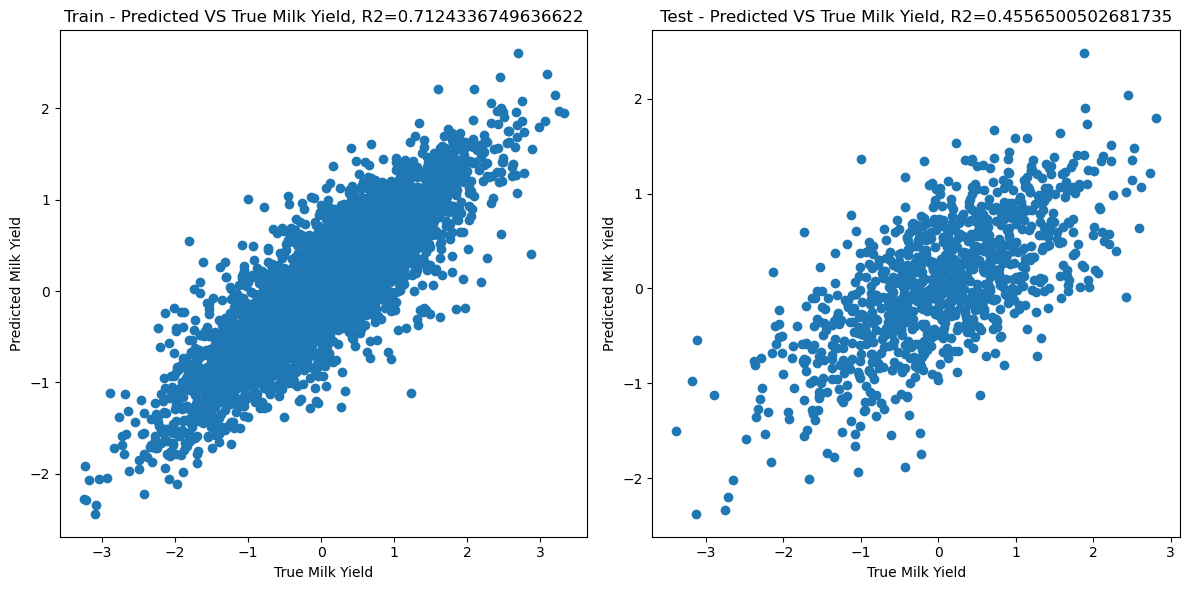

CPU times: user 1min 15s, sys: 18.6 s, total: 1min 34s
Wall time: 22.8 s


In [261]:
%%time
model_p = Sequential()
model_p.add(Conv1D(filters=64, kernel_size=10, strides=10, input_shape=(4157,1), activation='linear'))
model_p.add(Flatten())
model_p.add(Dense(64))
model_p.add(Dense(64))
model_p.add(Dense(1))

# Compile the model
model_p.compile(
    optimizer="adam",
    loss=tf.losses.MeanSquaredError(),
    metrics=['mse','r2_score']
)

# Print model summary
model_p.summary()

history_p = model_p.fit(
    X_train_array_float32_rs,
    y_train_array_float32_rs,
    validation_split=0.2,
    batch_size=10,
    epochs = 10)

model_for_plot = model_p
predict_train= model_for_plot.predict(X_train_array_float32_rs)
predict_test= model_for_plot.predict(X_test_array_float32)
plot_both(y_train,predict_train, y_test,predict_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


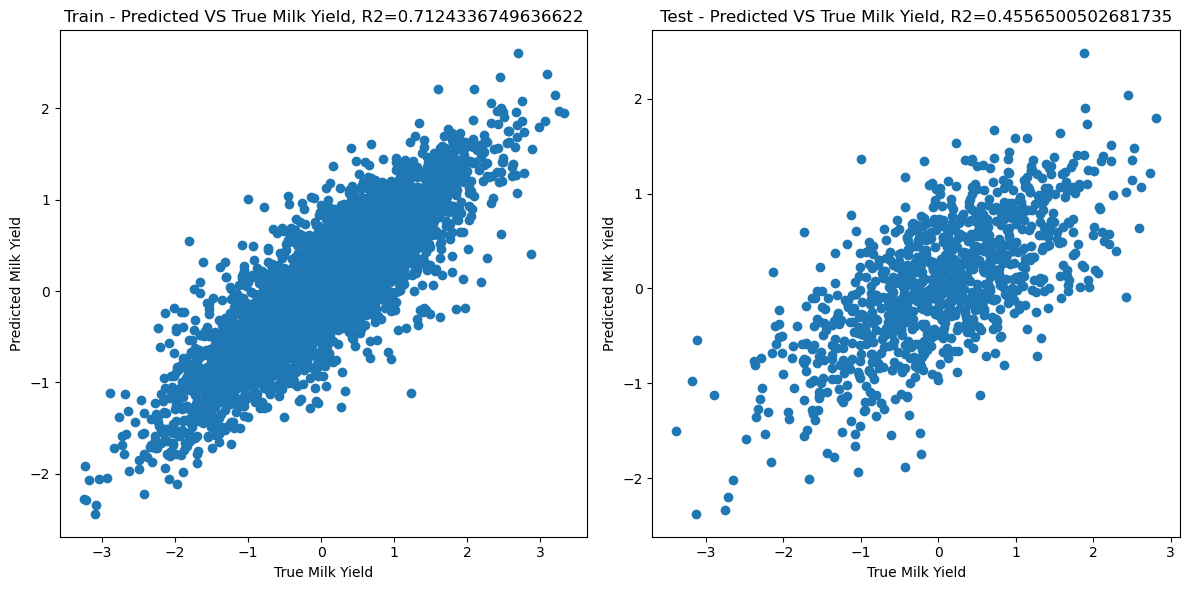

In [262]:
model_for_plot = model_p
predict_train= model_for_plot.predict(X_train_array_float32_rs)
predict_test= model_for_plot.predict(X_test_array_float32)
plot_both(y_train,predict_train, y_test,predict_test)

### Model 3 CNN with L1 regularization

Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_95 (Conv1D)              │ (None, 415, 64)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_65 (Flatten)            │ (None, 26560)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 64)             │     1,699,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,833 (6.50 MB)

 Trainable params: 1,704,833 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 48.9984 - mse: 48.6210 - r2_score: -49.9760 - val_loss: 0.6934 - val_mse: 0.6802 - val_r2_score: 0.3316
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8445 - mse: 0.8409 - r2_score: 0.1532 - val_loss: 0.5755 - val_mse: 0.5748 - val_r2_score: 0.4352
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5280 - mse: 0.5266 - r2_score: 0.4700 - val_loss: 0.5554 - val_mse: 0.5536 - val_r2_score: 0.4559
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3870 - mse: 0.3853 - r2_score: 0.6118 - val_loss: 0.5691 - val_mse: 0.5656 - val_r2_score: 0.4442
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3295 - mse: 0.3274 - r2_score: 0.6700 - val_loss: 0.5967 - val_mse: 0.5921 - val_r2_score: 0.4181
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3001 - mse: 0.2976 - r2_score: 0.7000 - val_loss: 0.6348 - val_mse: 0.6295 - val_r2_score: 0.3814
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━

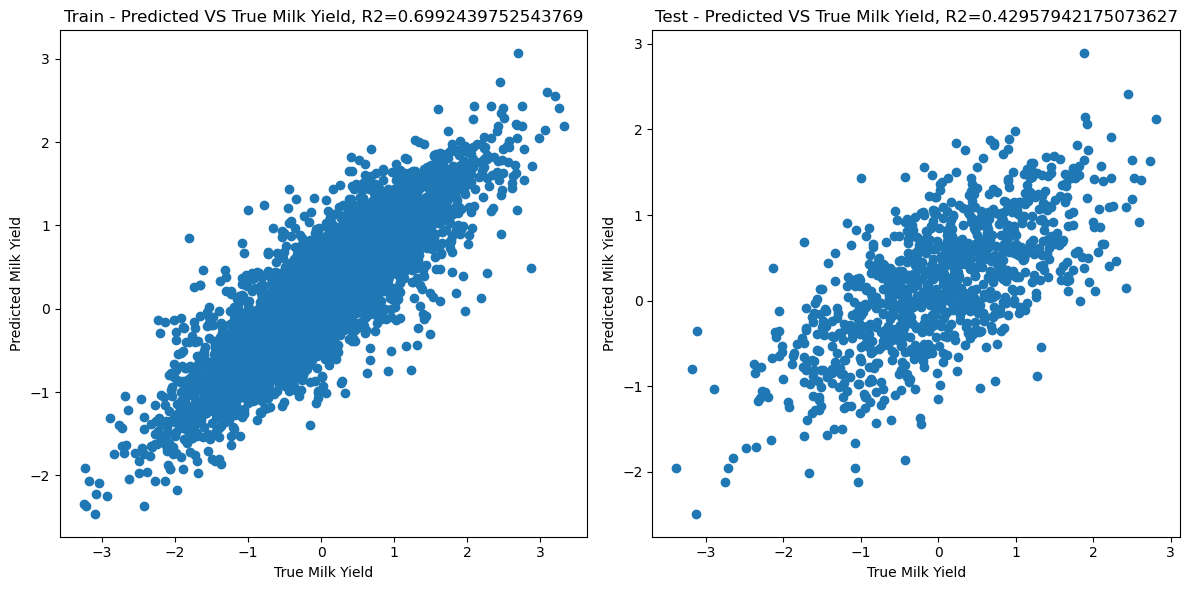

CPU times: user 1min 12s, sys: 18.1 s, total: 1min 30s
Wall time: 23.5 s


In [266]:
%%time
model_ridge = Sequential()
model_ridge.add(Conv1D(filters=64, kernel_size=10, strides=10, input_shape=(4157,1), activation='linear', bias_regularizer=regularizers.L1L2(l1=1.0)))
model_ridge.add(Flatten())
model_ridge.add(Dense(64))
model_ridge.add(Dense(64))
model_ridge.add(Dense(1))

# Compile the model
model_ridge.compile(
    optimizer="adam",
    loss=tf.losses.MeanSquaredError(),
    metrics=['mse','r2_score']
)

# Print model summary
model_ridge.summary()

history_ridge = model_ridge.fit(
    X_train_array_float32_rs,
    y_train_array_float32_rs,
    validation_split=0.2,
    batch_size=10,
    epochs = 10)

model_for_plot = model_ridge
predict_train= model_for_plot.predict(X_train_array_float32_rs)
predict_test= model_for_plot.predict(X_test_array_float32)
plot_both(y_train,predict_train, y_test,predict_test)

### Model 4 CNN with L1 and L2 regularization

In [264]:
%%time
model_ridge = Sequential()
model_ridge.add(Conv1D(filters=64, kernel_size=10, strides=10, input_shape=(4157,1), activation='linear', bias_regularizer=regularizers.L1L2(l1=1.0,l2=1e-4)))
model_ridge.add(Flatten())
model_ridge.add(Dense(64))
model_ridge.add(Dense(64))
model_ridge.add(Dense(1))

# Compile the model
model_ridge.compile(
    optimizer="adam",
    loss=tf.losses.MeanSquaredError(),
    metrics=['mse','r2_score']
)

# Print model summary
model_ridge.summary()

history_ridge = model_ridge.fit(
    X_train_array_float32_rs,
    y_train_array_float32_rs,
    validation_split=0.2,
    batch_size=10,
    epochs = 10)

Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_94 (Conv1D)              │ (None, 415, 64)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_64 (Flatten)            │ (None, 26560)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 64)             │     1,699,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,833 (6.50 MB)

 Trainable params: 1,704,833 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 37.1080 - mse: 36.7584 - r2_score: -37.5441 - val_loss: 0.7208 - val_mse: 0.7222 - val_r2_score: 0.2903
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7505 - mse: 0.7492 - r2_score: 0.2480 - val_loss: 0.5817 - val_mse: 0.5821 - val_r2_score: 0.4279
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5377 - mse: 0.5358 - r2_score: 0.4627 - val_loss: 0.5436 - val_mse: 0.5433 - val_r2_score: 0.4661
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4015 - mse: 0.3991 - r2_score: 0.5994 - val_loss: 0.5531 - val_mse: 0.5521 - val_r2_score: 0.4574
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3359 - mse: 0.3330 - r2_score: 0.6654 - val_loss: 0.5827 - val_mse: 0.5805 - val_r2_score: 0.4295
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3020 - mse: 0.2985 - r2_score: 0.6999 - val_loss: 0.6264 - val_mse: 0.6232 - val_r2_score: 0.3876
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


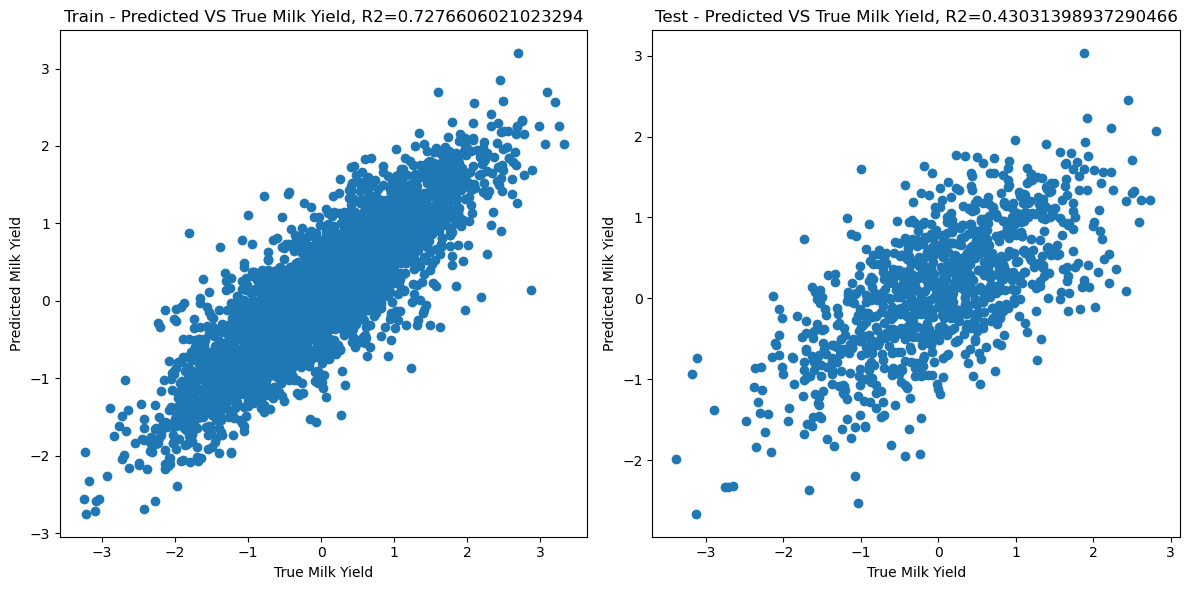

In [265]:
model_for_plot = model_ridge
predict_train= model_for_plot.predict(X_train_array_float32_rs)
predict_test= model_for_plot.predict(X_test_array_float32)
plot_both(y_train,predict_train, y_test,predict_test)